Connecté à Python 3.12.6

# Sales analysis and prediction for an e-commerce site

### Importing Libraries and Database

In [3]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation de la base de données
ecommerce = pd.read_excel(r"D:\Projets\Projet IT\Projet Datascience\reelproject\analyse & prediction des ventes\synthetic_sales_data.xlsx")

In [4]:
ecommerce

,Date,Product_ID,Product_Category,Quantité_Vendue,Prix_Unitaire,Discount,Promotion_Event,Publicité_Spend,Customer_ID,Region,Customer_Age_Group,Mode_d_Achat,Vacances_Fériées,Saison,Météo,Total_Vente
0,2022-01-01,P800,Tablettes,1,100,0,0,701,C7272,Est,18-25,Desktop,0,Automne,Neigeux,100
1,2022-01-01,P695,Ordinateurs,3,1500,20,0,117,C2941,Est,36-50,Desktop,0,Été,Pluvieux,3600
2,2022-01-01,P979,Ordinateurs,4,500,25,0,925,C1770,Nord,26-35,Mobile,0,Hiver,Pluvieux,1500
3,2022-01-01,P701,Écouteurs,5,1500,25,0,816,C9938,Est,36-50,Mobile,1,Printemps,Ensoleillé,5625
4,2022-01-01,P624,Écouteurs,5,500,5,0,941,C8182,Est,36-50,Mobile,0,Hiver,Pluvieux,2375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-01-01,P508,Smartphones,1,1500,20,1,159,C5427,Sud,18-25,Desktop,0,Été,Nuageux,1200
9996,2024-01-01,P258,Écouteurs,4,1000,5,0,692,C2334,Sud,36-50,Application,0,Automne,Pluvieux,3800
9997,2024-01-01,P256,Tablettes,6,100,20,0,521,C8536,Sud,26-35,Desktop,0,Été,Pluvieux,480
9998,2024-01-01,P241,Accessoires,8,200,10,0,655,C2996,Sud,51+,Desktop,0,Hiver,Nuageux,1440


In [5]:
# Vérification des valeurs manquantes
ecommerce.isnull().sum()

Date                  0
Product_ID            0
Product_Category      0
Quantité_Vendue       0
Prix_Unitaire         0
Discount              0
Promotion_Event       0
Publicité_Spend       0
Customer_ID           0
Region                0
Customer_Age_Group    0
Mode_d_Achat          0
Vacances_Fériées      0
Saison                0
Météo                 0
Total_Vente           0
dtype: int64

In [6]:
# Supression des doublons
ecommerce = ecommerce.drop_duplicates()
ecommerce

,Date,Product_ID,Product_Category,Quantité_Vendue,Prix_Unitaire,Discount,Promotion_Event,Publicité_Spend,Customer_ID,Region,Customer_Age_Group,Mode_d_Achat,Vacances_Fériées,Saison,Météo,Total_Vente
0,2022-01-01,P800,Tablettes,1,100,0,0,701,C7272,Est,18-25,Desktop,0,Automne,Neigeux,100
1,2022-01-01,P695,Ordinateurs,3,1500,20,0,117,C2941,Est,36-50,Desktop,0,Été,Pluvieux,3600
2,2022-01-01,P979,Ordinateurs,4,500,25,0,925,C1770,Nord,26-35,Mobile,0,Hiver,Pluvieux,1500
3,2022-01-01,P701,Écouteurs,5,1500,25,0,816,C9938,Est,36-50,Mobile,1,Printemps,Ensoleillé,5625
4,2022-01-01,P624,Écouteurs,5,500,5,0,941,C8182,Est,36-50,Mobile,0,Hiver,Pluvieux,2375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-01-01,P508,Smartphones,1,1500,20,1,159,C5427,Sud,18-25,Desktop,0,Été,Nuageux,1200
9996,2024-01-01,P258,Écouteurs,4,1000,5,0,692,C2334,Sud,36-50,Application,0,Automne,Pluvieux,3800
9997,2024-01-01,P256,Tablettes,6,100,20,0,521,C8536,Sud,26-35,Desktop,0,Été,Pluvieux,480
9998,2024-01-01,P241,Accessoires,8,200,10,0,655,C2996,Sud,51+,Desktop,0,Hiver,Nuageux,1440


In [7]:
ecommerce.columns

Index(['Date', 'Product_ID', 'Product_Category', 'Quantité_Vendue',
       'Prix_Unitaire', 'Discount', 'Promotion_Event', 'Publicité_Spend',
       'Customer_ID', 'Region', 'Customer_Age_Group', 'Mode_d_Achat',
       'Vacances_Fériées', 'Saison', 'Météo', 'Total_Vente'],
      dtype='object')

### Date to datetime conversions

In [8]:
# Conversion des dates en datetime
ecommerce['Date'] = pd.to_datetime(ecommerce['Date'])

In [9]:
ecommerce['Date'] 

0      2022-01-01
1      2022-01-01
2      2022-01-01
3      2022-01-01
4      2022-01-01
          ...    
9995   2024-01-01
9996   2024-01-01
9997   2024-01-01
9998   2024-01-01
9999   2024-01-01
Name: Date, Length: 10000, dtype: datetime64[ns]

In [10]:
# Extraction du mois et du trimestre
ecommerce['Mois'] = ecommerce['Date'].dt.month
ecommerce['Trimestre'] = ecommerce['Date'].dt.to_period('Q')

In [11]:
ecommerce

,Date,Product_ID,Product_Category,Quantité_Vendue,Prix_Unitaire,Discount,Promotion_Event,Publicité_Spend,Customer_ID,Region,Customer_Age_Group,Mode_d_Achat,Vacances_Fériées,Saison,Météo,Total_Vente,Mois,Trimestre
0,2022-01-01,P800,Tablettes,1,100,0,0,701,C7272,Est,18-25,Desktop,0,Automne,Neigeux,100,1,2022Q1
1,2022-01-01,P695,Ordinateurs,3,1500,20,0,117,C2941,Est,36-50,Desktop,0,Été,Pluvieux,3600,1,2022Q1
2,2022-01-01,P979,Ordinateurs,4,500,25,0,925,C1770,Nord,26-35,Mobile,0,Hiver,Pluvieux,1500,1,2022Q1
3,2022-01-01,P701,Écouteurs,5,1500,25,0,816,C9938,Est,36-50,Mobile,1,Printemps,Ensoleillé,5625,1,2022Q1
4,2022-01-01,P624,Écouteurs,5,500,5,0,941,C8182,Est,36-50,Mobile,0,Hiver,Pluvieux,2375,1,2022Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-01-01,P508,Smartphones,1,1500,20,1,159,C5427,Sud,18-25,Desktop,0,Été,Nuageux,1200,1,2024Q1
9996,2024-01-01,P258,Écouteurs,4,1000,5,0,692,C2334,Sud,36-50,Application,0,Automne,Pluvieux,3800,1,2024Q1
9997,2024-01-01,P256,Tablettes,6,100,20,0,521,C8536,Sud,26-35,Desktop,0,Été,Pluvieux,480,1,2024Q1
9998,2024-01-01,P241,Accessoires,8,200,10,0,655,C2996,Sud,51+,Desktop,0,Hiver,Nuageux,1440,1,2024Q1


In [12]:
ecommerce.columns

Index(['Date', 'Product_ID', 'Product_Category', 'Quantité_Vendue',
       'Prix_Unitaire', 'Discount', 'Promotion_Event', 'Publicité_Spend',
       'Customer_ID', 'Region', 'Customer_Age_Group', 'Mode_d_Achat',
       'Vacances_Fériées', 'Saison', 'Météo', 'Total_Vente', 'Mois',
       'Trimestre'],
      dtype='object')

In [13]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                10000 non-null  datetime64[ns]
 1   Product_ID          10000 non-null  object        
 2   Product_Category    10000 non-null  object        
 3   Quantité_Vendue     10000 non-null  int64         
 4   Prix_Unitaire       10000 non-null  int64         
 5   Discount            10000 non-null  int64         
 6   Promotion_Event     10000 non-null  int64         
 7   Publicité_Spend     10000 non-null  int64         
 8   Customer_ID         10000 non-null  object        
 9   Region              10000 non-null  object        
 10  Customer_Age_Group  10000 non-null  object        
 11  Mode_d_Achat        10000 non-null  object        
 12  Vacances_Fériées    10000 non-null  int64         
 13  Saison              10000 non-null  object     

### Descriptive statistics

In [14]:
# Statistique descriptives
statistic =ecommerce.select_dtypes(exclude=['object','datetime64','period[Q-DEC]']).describe()
statistic

,Quantité_Vendue,Prix_Unitaire,Discount,Promotion_Event,Publicité_Spend,Vacances_Fériées,Total_Vente,Mois
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.994500,677.980000,12.112500,0.198600,497.616500,0.103800,2978.083500,6.566900
std,2.577389,528.811009,9.262474,0.398966,287.888619,0.305016,3081.471424,3.453913
min,1.000000,100.000000,0.000000,0.000000,0.000000,0.000000,75.000000,1.000000
25%,3.000000,200.000000,5.000000,0.000000,250.000000,0.000000,665.000000,4.000000
50%,5.000000,500.000000,10.000000,0.000000,495.000000,0.000000,1600.000000,7.000000
75%,7.000000,1000.000000,20.000000,0.000000,746.000000,0.000000,4500.000000,10.000000
max,9.000000,1500.000000,25.000000,1.000000,999.000000,1.000000,13500.000000,12.000000


### Sales Analysis

In [15]:
# Total des ventes
total_ventes = ecommerce['Total_Vente'].sum()
print('Totaux des ventes =',total_ventes)

Totaux des ventes = 29780835


In [16]:
# Ventes par catégories de produits
ventes_par_categorie = ecommerce.groupby('Product_Category')['Total_Vente'].sum()
print('Les ventes réalisées par catégorie de produits')
ventes_par_categorie

Les ventes réalisées par catégorie de produits


Product_Category
Accessoires    5972010
Ordinateurs    5988505
Smartphones    5965615
Tablettes      5990420
Écouteurs      5864285
Name: Total_Vente, dtype: int64

In [17]:
# Ventes par trimestre
ventes_par_trimestre = ecommerce.groupby('Trimestre')['Total_Vente'].sum()
print('Les ventes trimestrielles')
ventes_par_trimestre


Les ventes trimestrielles


Trimestre
2022Q1    3399120
2022Q2    4032690
2022Q3    3352700
2022Q4    3624845
2023Q1    3680165
2023Q2    3634675
2023Q3    3891770
2023Q4    4116030
2024Q1      48840
Freq: Q-DEC, Name: Total_Vente, dtype: int64

In [18]:
# Ventes par saison
ventes_par_saison = ecommerce.groupby('Saison')['Total_Vente'].sum()
print('Les ventes saisonnières')
ventes_par_saison

Les ventes saisonnières


Saison
Automne      7427205
Hiver        7549530
Printemps    7445045
Été          7359055
Name: Total_Vente, dtype: int64

In [19]:
# Ventes par mois
ventes_par_mois = ecommerce.groupby('Mois')['Total_Vente'].sum()
print('Les ventes mensuelles')
ventes_par_mois

Les ventes mensuelles


Mois
1     2471035
2     2196570
3     2460520
4     2763720
5     2576220
6     2327425
7     2489140
8     2429500
9     2325830
10    2562750
11    2546685
12    2631440
Name: Total_Vente, dtype: int64

In [20]:
# Ventes par région
ventes_par_region = ecommerce.groupby('Region')['Total_Vente'].sum()
print('Les ventes régionales')
ventes_par_region


Les ventes régionales


Region
Est      7314135
Nord     7416080
Ouest    7640005
Sud      7410615
Name: Total_Vente, dtype: int64

In [21]:
# Ventes par météo
ventes_par_meteo = ecommerce.groupby('Météo')['Total_Vente'].sum()
print('Les ventes météorologiques')
ventes_par_meteo

Les ventes météorologiques


Météo
Ensoleillé    7603740
Neigeux       7517725
Nuageux       7409425
Pluvieux      7249945
Name: Total_Vente, dtype: int64

### Graphical visualization

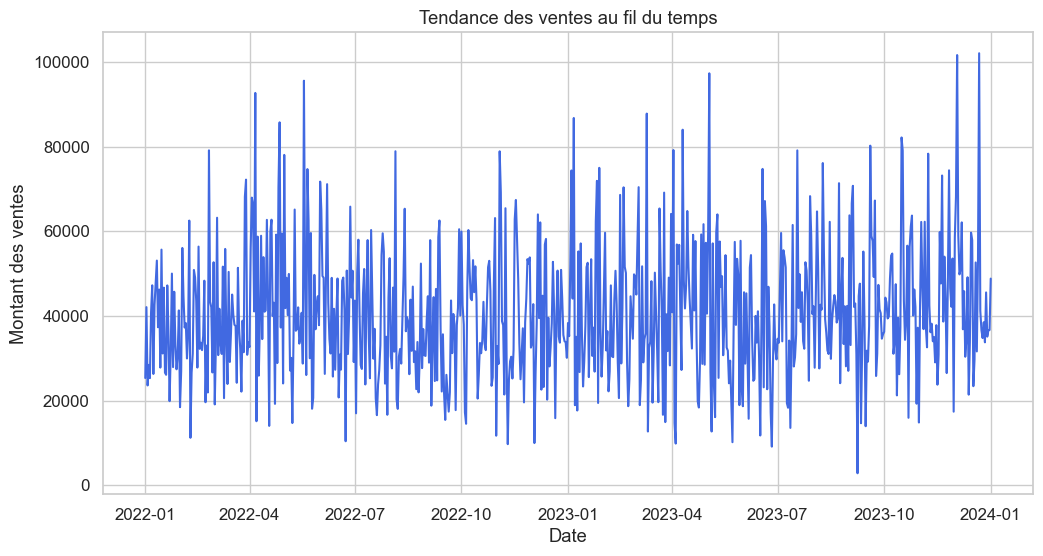

In [22]:
# Courbe des ventes au cours du temps
sns.set( style="whitegrid", palette="deep", font_scale=1.1)
ventes_par_date = ecommerce.groupby('Date')['Total_Vente'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventes_par_date, x='Date', y='Total_Vente', color='royalblue')
plt.title("Tendance des ventes au fil du temps")
plt.xlabel("Date")
plt.ylabel("Montant des ventes")
plt.show()

C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_16596\2750790060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventes_par_categorie,x='Product_Category', y='Total_Vente', palette='viridis')


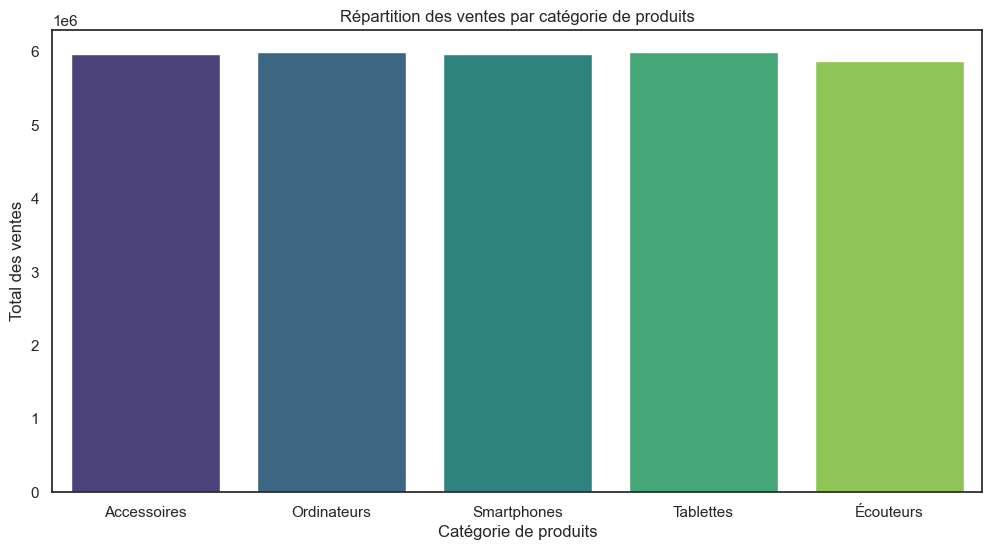

In [23]:
# Répartition des ventes par catégorie
sns.set(style='white', palette='muted',font_scale=1)
ventes_par_categorie = ecommerce.groupby('Product_Category')['Total_Vente'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=ventes_par_categorie,x='Product_Category', y='Total_Vente', palette='viridis')
plt.title("Répartition des ventes par catégorie de produits")
plt.xlabel("Catégorie de produits")
plt.ylabel("Total des ventes")
plt.show()

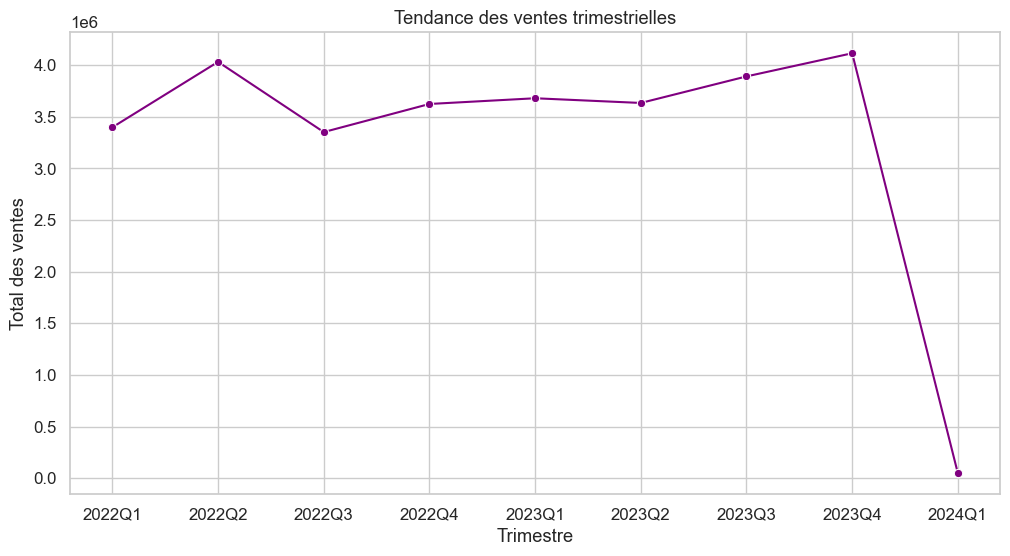

In [24]:
# Tendances des ventes par trimestre
sns.set(style='whitegrid', palette="deep", font_scale=1.1)
ventes_par_trimestre = ecommerce.groupby('Trimestre')['Total_Vente'].sum().reset_index()
ventes_par_trimestre['Trimestre']= ventes_par_trimestre['Trimestre'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventes_par_trimestre, x='Trimestre',y='Total_Vente', color='purple', marker='o')
plt.title('Tendance des ventes trimestrielles')
plt.xlabel('Trimestre')
plt.ylabel('Total des ventes')
plt.show()

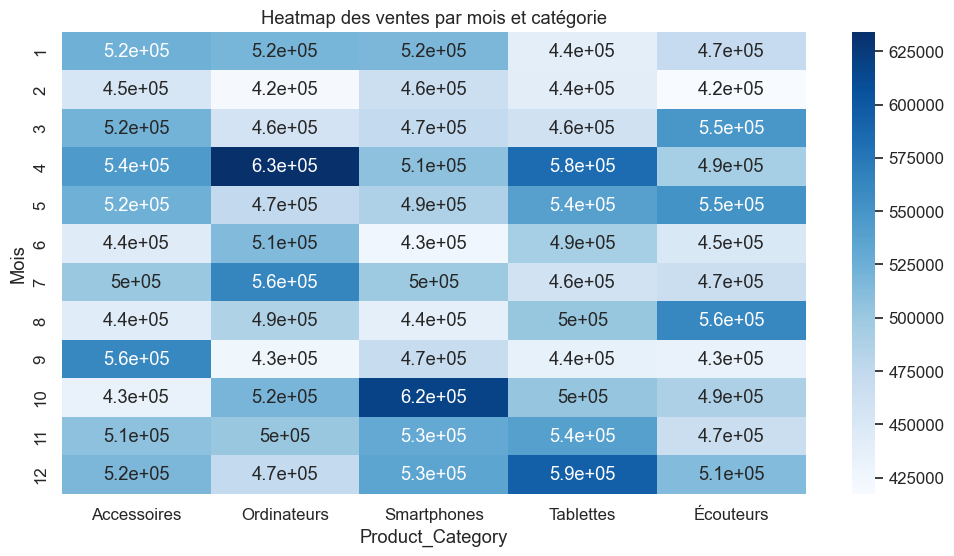

In [25]:
# Heatmap des ventes par mois et catégorie
sns.set(style='white', palette='deep', font_scale=1.1)
pivot_table = ecommerce.pivot_table(values='Total_Vente', index='Mois', columns='Product_Category', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, cmap="Blues")
plt.title("Heatmap des ventes par mois et catégorie")
plt.show()

### Identification of sales peaks linked to promotions or public holidays

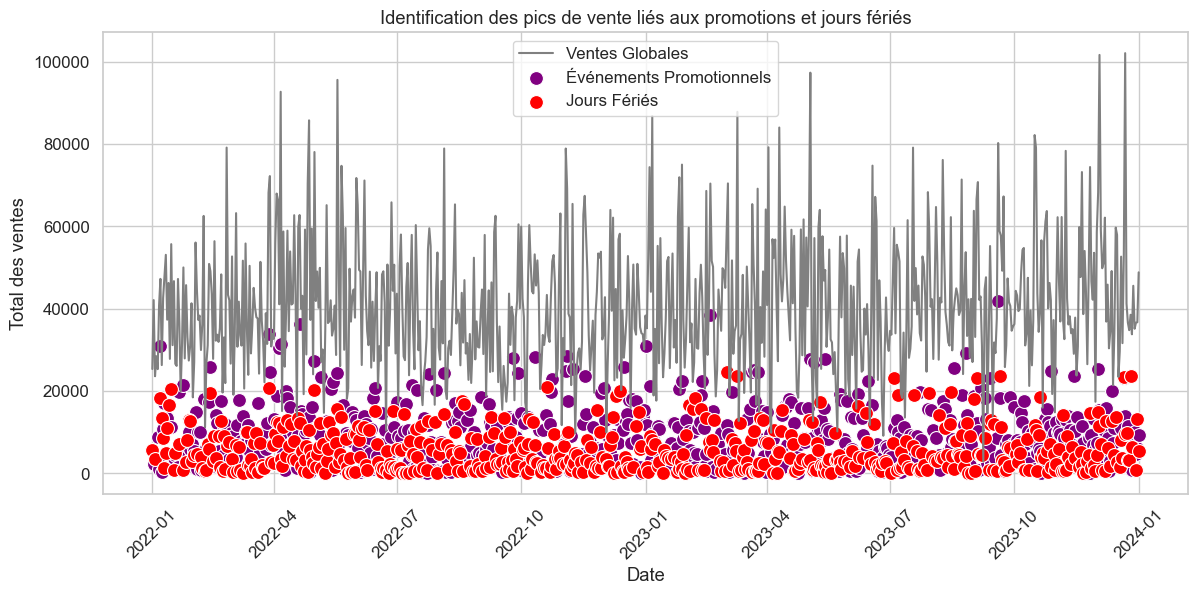

In [26]:
# Identification des pics de vente liés aux promotions ou jours fériés.
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Supposons que la base de données "ecommerce" est déjà chargée

# 1. Agréger les ventes par date pour identifier les pics
ventes_par_date = ecommerce.groupby('Date')['Total_Vente'].sum().reset_index()

# 2. Créer des sous-ensembles pour Promotions et Jours fériés
ventes_promotion = ecommerce[ecommerce['Promotion_Event'] == True].groupby('Date')['Total_Vente'].sum().reset_index()
ventes_ferie = ecommerce[ecommerce['Vacances_Fériées'] == True].groupby('Date')['Total_Vente'].sum().reset_index()

# 3. Visualisation des ventes avec des pics marqués
plt.figure(figsize=(14, 6))

# Courbe des ventes globales
sns.lineplot(data=ventes_par_date, x='Date', y='Total_Vente', label="Ventes Globales", color='gray')

# Points pour les événements promotionnels
sns.scatterplot(data=ventes_promotion, x='Date', y='Total_Vente', color='purple', s=100, label='Événements Promotionnels')

# Points pour les jours fériés
sns.scatterplot(data=ventes_ferie, x='Date', y='Total_Vente', color='red', s=100, label='Jours Fériés')

# Ajout de titres et légendes
plt.title("Identification des pics de vente liés aux promotions et jours fériés")
plt.xlabel("Date")
plt.ylabel("Total des ventes")
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Identification of the best products

In [27]:
# Identification des meilleurs produits
top_produits = ecommerce.groupby('Product_Category')['Total_Vente'].sum().sort_values(ascending=False).head(3)
print('Nos meilleurs produits après analyse')
print(top_produits)


Nos meilleurs produits après analyse
Product_Category
Tablettes      5990420
Ordinateurs    5988505
Accessoires    5972010
Name: Total_Vente, dtype: int64


In [28]:
ecommerce['Trimestre']

0       2022Q1
1       2022Q1
2       2022Q1
3       2022Q1
4       2022Q1
         ...  
9995    2024Q1
9996    2024Q1
9997    2024Q1
9998    2024Q1
9999    2024Q1
Name: Trimestre, Length: 10000, dtype: period[Q-DEC]

In [29]:
ecommerce['Mois']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Mois, Length: 10000, dtype: int32

## ARIMA Model Training

### Dickey-Fuller Stationarity Test

In [32]:
from statsmodels.tsa.stattools import adfuller

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(ventes_par_mois)

# Affichage des résultats avec interprétation
print("Résultats du test ADF:")
print(f"Statistique de test : {result[0]:.4f}")
print(f"p-value : {result[1]:.4f}")
print(f"Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")

# Interprétation
if result[1] < 0.05:
    print("La série est stationnaire (p-value < 0.05).")
else:
    print("La série n'est pas stationnaire (p-value >= 0.05). Considérez une transformation.")


Résultats du test ADF:
Statistique de test : -1.8207
p-value : 0.3702
Valeurs critiques :
   1%: -4.9387
   5%: -3.4776
   10%: -2.8439
La série n'est pas stationnaire (p-value >= 0.05). Considérez une transformation.


### Differentiation after non-stationarity

In [33]:
ventes_stationnaire = ventes_par_mois.diff().dropna()

### Visualization of differentiation

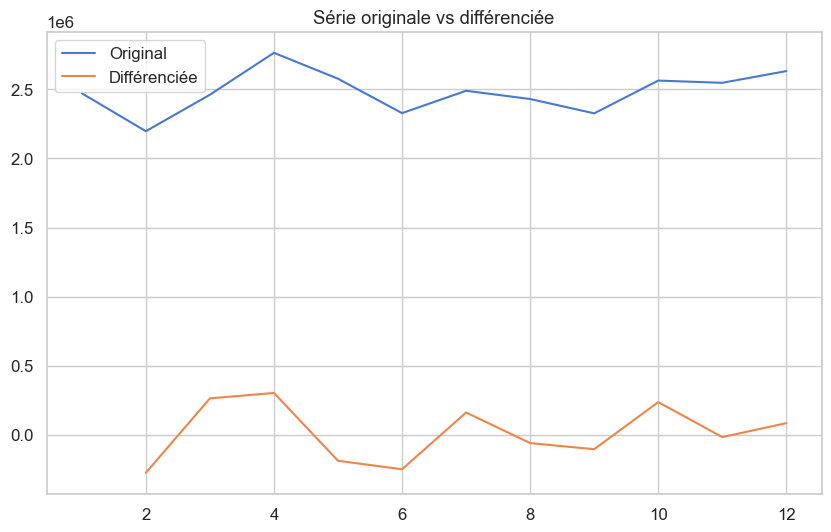

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(ventes_par_mois, label="Original")
plt.plot(ventes_par_mois.diff(), label="Différenciée")
plt.legend()
plt.title("Série originale vs différenciée")
plt.show()

### Graphical visualization to choose general parameters of the ARIMA model

Résultats du test ADF:
Statistique de test : -1.8207
p-value : 0.3702
Valeurs critiques :
   1%: -4.9387
   5%: -3.4776
   10%: -2.8439
La série n'est pas stationnaire (p-value >= 0.05). Différenciation appliquée.


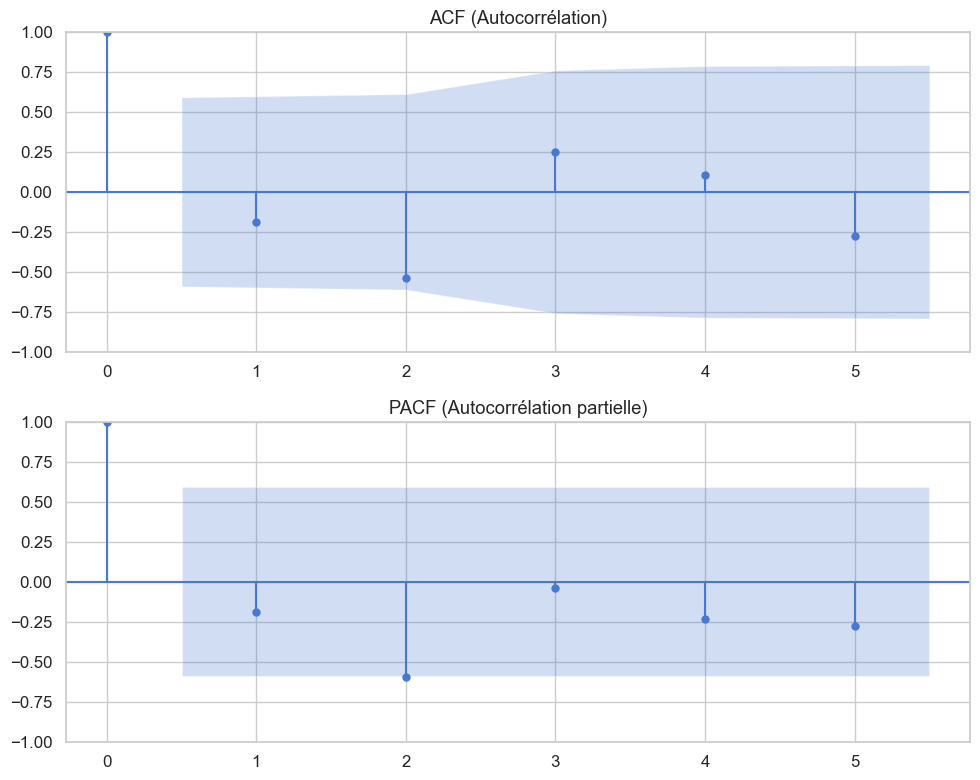

In [35]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Test de stationnarité avec ADF
result = adfuller(ventes_par_mois)
print("Résultats du test ADF:")
print(f"Statistique de test : {result[0]:.4f}")
print(f"p-value : {result[1]:.4f}")
print(f"Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")

# Interprétation
if result[1] < 0.05:
    print("La série est stationnaire (p-value < 0.05).")
    serie_stationnaire = ventes_par_mois  # Pas de transformation nécessaire
else:
    print("La série n'est pas stationnaire (p-value >= 0.05). Différenciation appliquée.")
    serie_stationnaire = ventes_par_mois.diff().dropna()  # Transformation par différenciation

# Tracer les ACF et PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# ACF (Autocorrélation)
plot_acf(serie_stationnaire, ax=axes[0], title="ACF (Autocorrélation)")

# PACF (Autocorrélation partielle)
plot_pacf(serie_stationnaire, ax=axes[1], title="PACF (Autocorrélation partielle)", method='ywm')

# Ajustement de la mise en page et affichage
plt.tight_layout()
plt.show()


### ARIMA model fit

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Entraînement du modèle ARIMA
model = ARIMA(ventes_par_mois, order=(1, 1, 1))  # p=1, d=1, q=1 comme point de départ
model_fit = model.fit()

# Résumé du modèle
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Total_Vente   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -148.786
Date:                Mon, 23 Dec 2024   AIC                            303.571
Time:                        11:50:24   BIC                            304.765
Sample:                             0   HQIC                           302.819
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2408      0.463     -0.520      0.603      -1.148       0.666
ma.L1          0.1264      0.643      0.197      0.844      -1.133       1.386
sigma2      2.387e+10   4.24e-12   5.62e+21      0.0

C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


### Prédiction des ventes pour les 12 prochains mois

In [37]:
# Prévisions
forecast = model_fit.forecast(steps=12)
print(f"Prévisions pour les 12 prochains mois :\n{forecast}")

Prévisions pour les 12 prochains mois :
12    2.621062e+06
13    2.623561e+06
14    2.622959e+06
15    2.623104e+06
16    2.623069e+06
17    2.623078e+06
18    2.623076e+06
19    2.623076e+06
20    2.623076e+06
21    2.623076e+06
22    2.623076e+06
23    2.623076e+06
Name: predicted_mean, dtype: float64


C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Retraining the ARIMA model after changing general parameters

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Entraînement du modèle ARIMA
model = ARIMA(ventes_par_mois, order=(2, 1, 2))  # p=1, d=1, q=1 comme point de départ
model_fit = model.fit()

# Résumé du modèle
print(model_fit.summary())


C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Pyth

                               SARIMAX Results                                
Dep. Variable:            Total_Vente   No. Observations:                   12
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -344.728
Date:                Mon, 23 Dec 2024   AIC                            699.456
Time:                        11:50:24   BIC                            701.446
Sample:                             0   HQIC                           698.202
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1984      0.006    -34.669      0.000      -0.210      -0.187
ar.L2         -0.6550      0.006   -112.292      0.000      -0.666      -0.644
ma.L1          0.0572      0.006     10.074      0.0

C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Sales prediction after changing general settings

In [39]:

# Prévisions
forecast = model_fit.forecast(steps=12)
print(f"Prévisions pour les 12 prochains mois :\n{forecast}")

Prévisions pour les 12 prochains mois :
12    2.584818e+06
13    2.590235e+06
14    2.619697e+06
15    2.610304e+06
16    2.592870e+06
17    2.602481e+06
18    2.611993e+06
19    2.603811e+06
20    2.599204e+06
21    2.605477e+06
22    2.607250e+06
23    2.602790e+06
Name: predicted_mean, dtype: float64


C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP ELITEBOOK 840 G6\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Converting dates to datetime

In [40]:
# # Conversion des dates en datetime
# ecommerce['Date'] = pd.to_datetime(ecommerce['Date'])

# # Extraction du mois et du trimestre
# ecommerce['Mois'] = ecommerce['Date'].dt.month

# # Extraction du trimestre sous forme numérique (1, 2, 3, 4)
# ecommerce['Trimestre'] = ecommerce['Date'].dt.quarter

# # Si vous voulez un format 'année + trimestre' (par exemple '2025Q1')
# # ecommerce['Trimestre'] = ecommerce['Date'].dt.to_period('Q').astype(str)


### Machine Learning Model Training, Random Forest and Forecasting Sales for the Next 12 Months

RMSE: 0.00, R²: 1.00
Prévisions des ventes pour les 12 prochains mois :
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


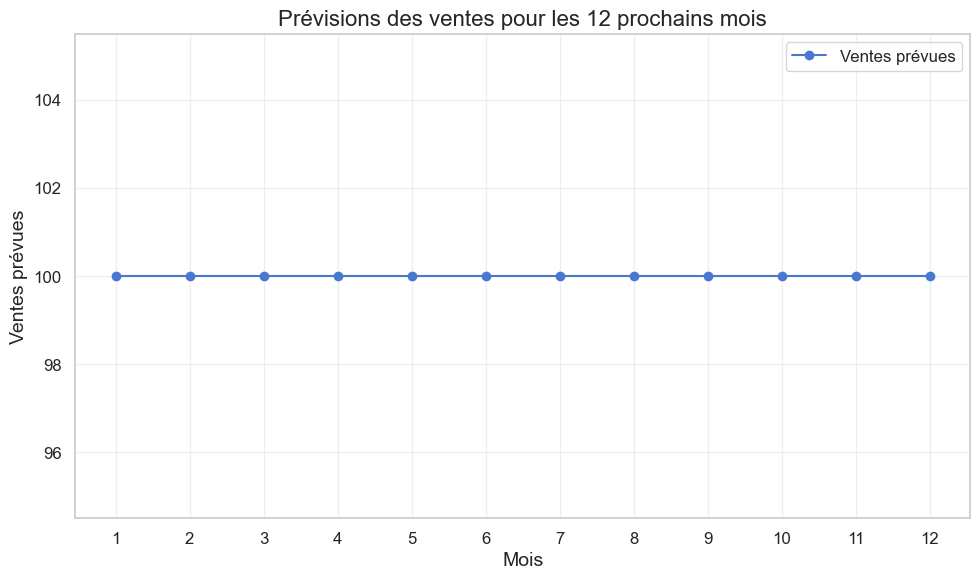

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# 1. Load and preprocess the data
# Convert 'Date' to datetime (ensure it's not in a Period format)
ecommerce['Date'] = pd.to_datetime(ecommerce['Date'], errors='coerce')

# Extract 'Mois' and 'Année' (ensure these are numeric)
ecommerce['Mois'] = ecommerce['Date'].dt.month.astype(int)
ecommerce['Année'] = ecommerce['Date'].dt.year.astype(int)

# Encode categorical variables ('Saison', 'Region', 'Météo')
categorical_columns = ['Saison', 'Region', 'Météo']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_vars = pd.DataFrame(
    encoder.fit_transform(ecommerce[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns)
)

# Concatenate encoded variables with the dataset and drop original categorical columns
ecommerce_cleaned = pd.concat([ecommerce.reset_index(drop=True), encoded_vars], axis=1)
ecommerce_cleaned = ecommerce_cleaned.drop(columns=categorical_columns + ['Date'])
ecommerce_cleaned = round(ecommerce_cleaned)
# Ensure 'Mois' and 'Année' are numeric
ecommerce_cleaned['Mois'] = ecommerce_cleaned['Mois'].astype(int)
ecommerce_cleaned['Année'] = ecommerce_cleaned['Année'].astype(int)

# 2. Prepare data for the model
X = ecommerce_cleaned.drop(columns=['Total_Vente','Product_ID','Customer_ID','Product_Category','Customer_Age_Group','Mode_d_Achat'])
y = ecommerce_cleaned['Total_Vente']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, R²: {r2:.2f}")

# 4. Generate predictions for the next 12 months
# Récupération des colonnes utilisées pour l'entraînement
required_columns = X_train.columns  # Colonnes utilisées pour entraîner le modèle

# Créez future_data avec les mêmes colonnes
future_data = pd.DataFrame({
    'Quantité_Vendue': [0] * 12,  # Par défaut à 0
    'Prix_Unitaire': [0] * 12,     # Par défaut à 0
    'Discount': [0] * 12,          # Par défaut à 0
    'Promotion_Event': [0] * 12,   # Par défaut à 0
    'Publicité_Spend': [0] * 12,   # Par défaut à 0
    'Vacances_Fériées': [0] * 12,  # Par défaut à 0
    'Mois': list(range(1, 13)),    # Mois de 1 à 12
    'Trimestre': [1] * 12,         # Trimestre (par exemple, 1 pour le premier trimestre)
    'Année': [2025] * 12,          # Année 2025 pour les prédictions futures
    'Saison_Hiver': [0] * 12,      # Par défaut à 0 pour l'encodage
    'Saison_Printemps': [0] * 12,  # Par défaut à 0 pour l'encodage
    'Saison_Été': [0] * 12,        # Par défaut à 0 pour l'encodage
    'Region_Nord': [0] * 12,       # Par défaut à 0 pour l'encodage
    'Region_Ouest': [0] * 12,      # Par défaut à 0 pour l'encodage
    'Region_Sud': [0] * 12,        # Par défaut à 0 pour l'encodage
    'Météo_Neigeux': [0] * 12,     # Par défaut à 0 pour l'encodage
    'Météo_Nuageux': [0] * 12,     # Par défaut à 0 pour l'encodage
    'Météo_Pluvieux': [0] * 12     # Par défaut à 0 pour l'encodage
})

# Réorganiser les colonnes dans le même ordre que dans X_train
future_data = future_data[required_columns]

# Prédire les ventes pour les 12 prochains mois
future_sales = rf_model.predict(future_data)
print("Prévisions des ventes pour les 12 prochains mois :")
print(future_sales)

import matplotlib.pyplot as plt

# Afficher les prédictions graphiquement
months = list(range(1, 13))  # Mois de 1 à 12

plt.figure(figsize=(10, 6))
plt.plot(months, future_sales, marker='o', linestyle='-', color='b', label="Ventes prévues")
plt.title("Prévisions des ventes pour les 12 prochains mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Ventes prévues", fontsize=14)
plt.xticks(months)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


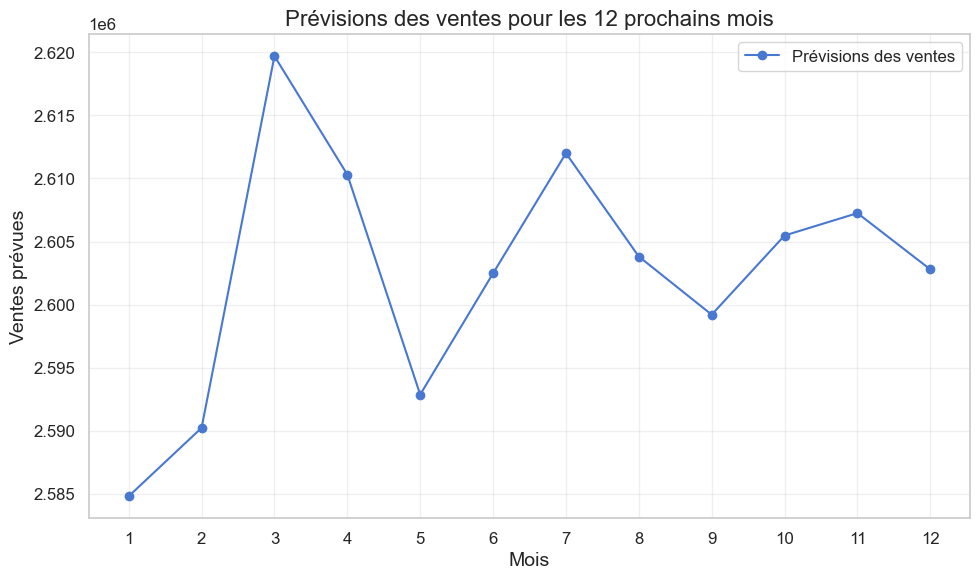

In [45]:
import matplotlib.pyplot as plt

# Assurez-vous que 'forecast' contient les prévisions sous forme de liste ou de pandas.Series
forecast_months = list(range(1, 13))  # Mois de 1 à 12

plt.figure(figsize=(10, 6))
plt.plot(forecast_months, forecast, marker='o', linestyle='-', color='b', label="Prévisions des ventes")
plt.title("Prévisions des ventes pour les 12 prochains mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Ventes prévues", fontsize=14)
plt.xticks(forecast_months)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

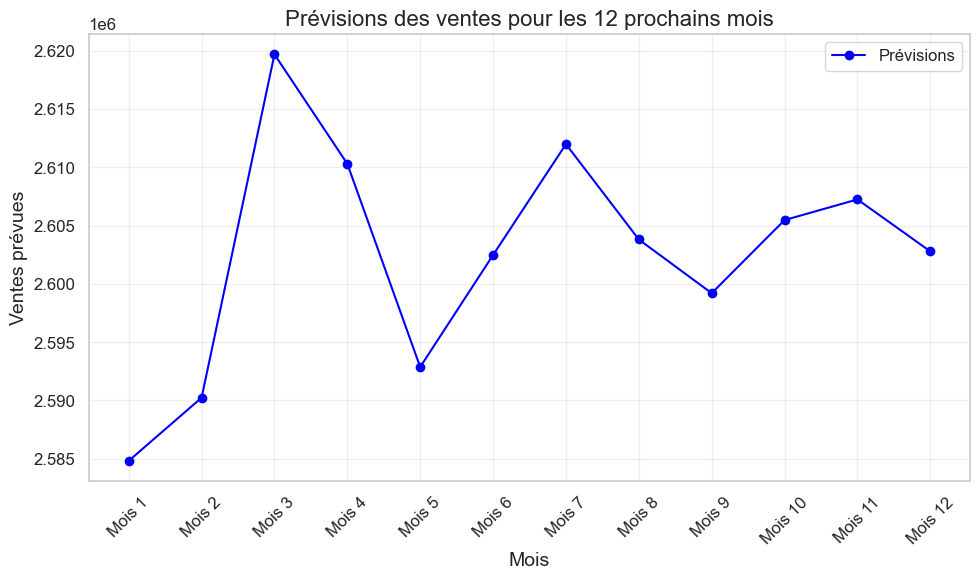

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Convertir 'forecast' en une liste ou un tableau si ce n'est pas déjà le cas
forecast_values = np.array(forecast)  # Assurez-vous que forecast est une séquence numérique

# Générer les labels pour les 12 prochains mois (par exemple, Mois 1 à Mois 12)
forecast_months = [f"Mois {i}" for i in range(1, 13)]

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(forecast_months, forecast_values, marker='o', linestyle='-', color='blue', label="Prévisions")
plt.title("Prévisions des ventes pour les 12 prochains mois", fontsize=16)
plt.xlabel("Mois", fontsize=14)
plt.ylabel("Ventes prévues", fontsize=14)
plt.xticks(rotation=45)  # Rotation des labels sur l'axe des X si nécessaire
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Afficher le graphique
plt.show()
